# Predicting successful restaurants

## Research question: Is it possible to predict successful restaurants based on certain characteristics?

In [ ]:
# !pip install selenium
# !pip install python-bidi

In [1]:
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import scipy as sc
import numpy as np
import requests
import selenium
import time
import random
import glob
import os
import re
import ast
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.keys import Keys
from bidi import algorithm as bidialg
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## crawling

### In order to answer the research question I collected data on restaurants from the tripadvisor website. The data I collected are: city, address, restaurant rating in the city, overall rating on the site, food rating, service, value and atmosphere, how many people rated the restaurant and how many of them indicated that the restaurant is excellent / very good / average / not good / very bad, price, if The restaurant has a website, telephone and menu (found on the website).

In [ ]:
PATH = "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)
driver.get("https://www.tripadvisor.co.il/Restaurants-g4-Europe.html")

In [ ]:
Name=[]
City=[]
Address=[]
Rating_City=[]
Rating_Food=[]
Rating_Service=[]
Rating_Value=[]
Rating_Ambience=[]
Rating_total=[]
Rating_Excellent=[]
Rating_Very_Good=[]
Rating_Average=[]
Rating_Bad=[]
Rating_Very_Bad=[]
Reviews=[]
Type=[]
Remarks=[]
Expensive=[]
Price=[]
URL=[]
Phone=[]
Num_of_days=[]
Menu=[]

In [ ]:
for i in range(0, 19):
    time.sleep(7)
    elements = driver.find_elements(By.CLASS_NAME,"geo_wrap")
    try:
        elements[i].click()
        time.sleep(6)
    except:
        continue
    if(driver.find_elements(By.CLASS_NAME, "RfBGI") == []):
            driver.back()
            continue
    rand = [1, 2, 5, 10, 13, 18, 23, 25]
    for j in range(1,18):
        
        try:
            rests = driver.find_elements(By.CLASS_NAME, "RfBGI")
        except:
            continue
        time.sleep(5)
        for r in rand:
            try:
                rests[r].click()
                time.sleep(6)
            except:
                continue
            
            try:
                driver.switch_to.window(driver.window_handles[1]) 
            except:
                continue
                
            time.sleep(3)
            
            try:                                              
                element = driver.find_element(By.CLASS_NAME, 'ZDEqb')
                Rating_total.append(element.text[0:-1])
            except:
                continue 
                
            try:
                element = driver.find_element(By.CLASS_NAME, 'HjBfq')
                Name.append(element.text)
            except:
                Name.append(None)

            try:
                element = driver.find_element(By.XPATH, '//*[@id="component_47"]/div[1]/div/div[1]/div/div[3]/div[2]/div[1]/span[3]/span')
                Rating_Food.append(element.get_attribute('class')[24:])
            except:
                Rating_Food.append(None)
                
            try:
                element = driver.find_element(By.XPATH, '//*[@id="component_47"]/div[1]/div/div[1]/div/div[3]/div[2]/div[2]/span[3]/span')
                Rating_Service.append(element.get_attribute('class')[24:])
            except:
                Rating_Service.append(None)
                
            try:
                element = driver.find_element(By.XPATH, '//*[@id="component_47"]/div[1]/div/div[1]/div/div[3]/div[2]/div[3]/span[3]/span')
                Rating_Value.append(element.get_attribute('class')[24:])
            except:
                Rating_Value.append(None)
                
            try:
                element = driver.find_element(By.XPATH, '//*[@id="component_47"]/div[1]/div/div[1]/div/div[3]/div[2]/div[4]/span[3]/span')
                Rating_Ambience.append(element.get_attribute('class')[24:])
            except:
                Rating_Ambience.append(None)
                
            try:
                element = driver.find_elements(By.CLASS_NAME, 'SrqKb')[0]
                Price.append(element.text)
            except:
                Price.append(None) 

            try:
                element = driver.find_element(By.CLASS_NAME, 'reviews_header_count')
                Reviews.append(element.text[1:-1])
            except:
                Reviews.append(None) 
                   
            try:
                element = driver.find_elements(By.CLASS_NAME, 'SrqKb')[2]
                Remarks.append(element.text)
            except:
                    Remarks.append(None) 
                    
            try:
                element = driver.find_elements(By.CLASS_NAME, 'SrqKb')[1]                   
                Type.append(element.text)               
            except:
                    Type.append(None)

            try:
                element = driver.find_element(By.XPATH, '//*[@id="taplc_trip_planner_breadcrumbs_0"]/ul/li[4]/a/span')
                City.append(element.text)
            except:
                City.append(None) 
                
            time.sleep(3)
            
            try:
                element = driver.find_element(By.XPATH, '//*[@id="taplc_detail_filters_rr_resp_0"]/div/div[1]/div/div[2]/div[4]/div/div[2]/div[1]/div[1]/label/span')
                element.click()
            except:
                continue

            try:
                element = driver.find_element(By.XPATH, '//*[@id="taplc_detail_filters_rr_resp_0"]/div/div[1]/div/div[2]/div[1]/div/div[2]/div/div[1]/span[2]')
                Rating_Excellent.append(element.text)  
            except:
                Rating_Excellent.append(None)

            try:
                element = driver.find_element(By.XPATH, '//*[@id="taplc_detail_filters_rr_resp_0"]/div/div[1]/div/div[2]/div[1]/div/div[2]/div/div[2]/span[2]')
                Rating_Very_Good.append(element.text)
            except:
                Reting_Very_Good.append(None) 

            try:
                element = driver.find_element(By.XPATH, '//*[@id="taplc_detail_filters_rr_resp_0"]/div/div[1]/div/div[2]/div[1]/div/div[2]/div/div[3]/span[2]')
                Rating_Average.append(element.text)
            except:
                Reting_Average.append(None)  

            try:
                element = driver.find_element(By.XPATH, '//*[@id="taplc_detail_filters_rr_resp_0"]/div/div[1]/div/div[2]/div[1]/div/div[2]/div/div[4]/span[2]')
                Rating_Bad.append(element.text)
            except:
                Reting_Bad.append(None)  

            try:
                element = driver.find_element(By.XPATH, '//*[@id="taplc_detail_filters_rr_resp_0"]/div/div[1]/div/div[2]/div[1]/div/div[2]/div/div[5]/span[2]')               
                Rating_Very_Bad.append(element.text)
            except:
                Reting_Very_Bad.append(None)      

            try:
                element = driver.find_element(By.XPATH, '//*[@id="component_47"]/div[1]/div/div[3]/div/div/div[1]/span[2]/a')
                Address.append(element.text)
            except:
                Address.append(None)    

            try:
                element = driver.find_element(By.XPATH, '//*[@id="component_47"]/div[1]/div/div[1]/div/div[1]/div[2]')
                Rating_City.append(element.text)
            except:
                Rating_City.append(None) 
                
            time.sleep(3)

            try:
                element = driver.find_element(By.XPATH, '//*[@id="component_46"]/div/div[3]/span[2]/span/span[2]/a')
                Phone.append(element.text)
            except:
                Phone.append(None)       
                
            try:
                element = driver.find_element(By.XPATH, '//*[@id="component_46"]/div/div[2]/span[3]/a[1]')
                Expensive.append(element.text)
            except:
                Expensive.append(None)  
                
            try:
                driver.find_element(By.CLASS_NAME, 'KscYp').click()
                element = driver.find_elements(By.CLASS_NAME, 'BhOTk')
                Num_of_days.append(len(element))
                driver.find_element(By.CLASS_NAME, 'Tatqp._Q.t._U.c._S').click()
            except:
                Num_of_days.append(None)
                
            try:
                element = driver.find_element(By.XPATH, '//*[@id="component_46"]/div/div[3]/span[3]/span/a')
                URL.append(element.get_attribute("href"))
            except:
                URL.append(None)
                
            try:
                element = driver.find_element(By.XPATH, '//*[@id="component_46"]/div/div[3]/span[4]/a')
                Menu.append(element.get_attribute("href"))
            except:
                Menu.append(None)

            driver.close()
            driver.switch_to.window(driver.window_handles[0])
            time.sleep(5)
        
        try:
            driver.find_element(By.CLASS_NAME, 'nav.next.rndBtn.ui_button.primary.taLnk').click()
        except:
            continue
        driver.execute_script("window.scrollTo(0, 220)")
        rests.clear()
        time.sleep(3)
        driver.switch_to.window(driver.window_handles[0])
    
    driver.get("https://www.tripadvisor.co.il/Restaurants-g4-Europe.html")
    time.sleep(5)

In [ ]:
df = pd.DataFrame({'Name':Name, 'City':City, 'Address':Address, 'Rating_City':Rating_City, 'Rating_Food':Rating_Food,
                   'Rating_Service':Rating_Service, 'Rating_Value':Rating_Value, 'Rating_Ambience':Rating_Ambience, 
                   'Rating_total':Rating_total, 'Rating_Excellent':Rating_Excellent, 'Rating_Very_Good':Rating_Very_Good, 
                   'Rating_Average':Rating_Average, 'Rating_Bad':Rating_Bad, 'Rating_Very_Bad':Rating_Very_Bad,
                   'Reviews':Reviews, 'Type':Type, 'Remarks':Remarks, 'Expensive':Expensive, 'Price':Price, 'URL':URL,
                   'Phone':Phone, 'Num_of_days':Num_of_days, 'Menu':Menu})

In [ ]:
df.to_csv("df.csv", index=False, header=True, encoding='utf-8-sig')

### Since I could not run the program at one time, I ran the sections and merged them into one file 

In [3]:
files = os.path.join("C:\\Users\\hanig\\OneDrive\\שולחן העבודה\\שקד", 'df*.csv')
files = glob.glob(files)
Data = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(Data)

                         Name          City  \
0                      Vrutal  מחוז ברצלונה   
1                   BelleBuon  מחוז ברצלונה   
2     La Gastronomica Burgers  מחוז ברצלונה   
3         La Cala Barceloneta  מחוז ברצלונה   
4                     Blu Bar  מחוז ברצלונה   
...                       ...           ...   
2373                La Botana        מיורקה   
2374              Block House        מיורקה   
2375             Tasca O Faro        מיורקה   
2376        Restaurante David        מיורקה   
2377                Terragust        מיורקה   

                                                Address  \
0     ‪Rambla del Poblenou No 16‬ Bajos 4, 08005 ברצ...   
1       ‪Travessera de Gracia, 441‬, 08025 ברצלונה ספרד   
2            ‪Carrer Vilamari 9-15‬, 08015 ברצלונה ספרד   
3           ‪Carrer de l'Escar, 18‬, 08039 ברצלונה ספרד   
4                                                   NaN   
...                                                 ...   
2373  ‪Carrer de Can B

In [ ]:
Data.to_csv("Data.csv", index=False, encoding='utf-8-sig')

In [4]:
df = pd.read_csv("Data.csv")

In [5]:
df

,Name,City,Address,Rating_City,Rating_Food,Rating_Service,Rating_Value,Rating_Ambience,Rating_total,Rating_Excellent,...,Rating_Very_Bad,Reviews,Type,Remarks,Expensive,Price,URL,Phone,Num_of_days,Menu
0,Vrutal,מחוז ברצלונה,"‪Rambla del Poblenou No 16‬ Bajos 4, 08005 ברצ...","מס' 1 מתוך 8,850 מסעדות בברצלונה",50.0,50.0,45.0,NaN,5.0,752,...,3,795,"בר, בריא","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",‪$$ - $$$‬,29 ₪ - 80 ₪,http://www.vrutal.es/es,+34 934 91 48 06,7.0,https://www.vrutal.es/es/comida
1,BelleBuon,מחוז ברצלונה,"‪Travessera de Gracia, 441‬, 08025 ברצלונה ספרד","מס' 2 מתוך 8,850 מסעדות בברצלונה",50.0,45.0,45.0,45.0,5.0,"2,686",...,21,"3,079","איטלקי, נפוליטני, קמפניה, סיציליאני, דרום איטלקי",אפשרויות ללא גלוטן,‪$$ - $$$‬,36 ₪ - 90 ₪,http://www.bellebuon.com/,+34 935 14 19 71,6.0,https://www.facebook.com/bellebuon.restaurante...
2,La Gastronomica Burgers,מחוז ברצלונה,"‪Carrer Vilamari 9-15‬, 08015 ברצלונה ספרד","מס' 5 מתוך 8,850 מסעדות בברצלונה",50.0,50.0,45.0,NaN,5.0,"1,295",...,6,"1,483",מאכלי רחוב,"ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",‪$$ - $$$‬,43 ₪ - 54 ₪,http://www.lagastronomicabcn.com/,+34 934 24 90 28,5.0,http://lagastronomicabcn.com/
3,La Cala Barceloneta,מחוז ברצלונה,"‪Carrer de l'Escar, 18‬, 08039 ברצלונה ספרד","מס' 9 מתוך 8,850 מסעדות בברצלונה",50.0,50.0,50.0,NaN,5.0,178,...,0,188,"ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...","ארוחת בוקר, ארוחת צהריים, בראנץ'",$,"בית קפה, ים תיכוני, ספרדי",https://www.facebook.com/La-Cala-Barceloneta-1...,+34 627 25 77 01,7.0,NaN
4,Blu Bar,מחוז ברצלונה,NaN,NaN,NaN,NaN,NaN,NaN,5.0,"1,131",...,13,"1,255","בר, ים תיכוני, בריא, בינלאומי, מאכלי רחוב","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",NaN,11 ₪ - 72 ₪,NaN,NaN,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,La Botana,מיורקה,"‪Carrer de Can Brondo 6‬, 07001 פלמה דה מיורקה...","מס' 116 מתוך 2,066 מסעדות בפלמה דה מיורקה",45.0,40.0,45.0,40.0,4.5,574,...,32,979,"ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...","ארוחת צהריים, ארוחת ערב, בראנץ'",$,"ים תיכוני, אירופאי, ספרדי",https://www.facebook.com/La-botana-33284435681...,+34 971 72 18 19,6.0,NaN
2374,Block House,מיורקה,"‪Plaza Central‬ Gr. Parkplatz, 07180 סנטה פונס...",מס' 23 מתוך 152 מסעדות בסנטה פונסה,45.0,45.0,40.0,40.0,4.5,317,...,16,514,"ידידותי לצמחוניים, אפשרויות ללא גלוטן","ארוחת צהריים, ארוחת ערב, שעות הלילה המאוחרות",‪$$ - $$$‬,"מסעדת סטייקים, אירופאי, גריל",http://www.block-house.es/open/index.php?lang=7,+34 971 59 45 00,NaN,NaN
2375,Tasca O Faro,מיורקה,"‪Calle Illa de Xipre 33‬ coll d'en Rebassa, 07...",מס' 46 מתוך 905 ספרדי בפלמה דה מיורקה,45.0,45.0,45.0,NaN,4.5,94,...,1,141,"ידידותי לצמחוניים, אפשרויות ללא גלוטן","ארוחת צהריים, ארוחת ערב",‪$$ - $$$‬,ספרדי,http://www.facebook.com/tascaofaro,+34 629 27 07 90,NaN,https://www.tripadvisor.co.il/UpdateListing-d9...
2376,Restaurante David,מיורקה,NaN,NaN,NaN,NaN,NaN,NaN,4.5,124,...,3,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Arranging the data

### In some pages, the type of restaurant was in place of the price / remarks and vice versa, so I arranged the dataframe

In [6]:
df['City'].unique()

array(['מחוז ברצלונה', 'מחוז ולנסיה', 'מסעדות באיסטנבול', 'מוסקבה',
       'רומא', 'מדריד', 'סנט פטרסבורג', 'מחוז ליסבון', 'וינה', 'אמסטרדם',
       'פראג', 'טנריף', 'לונדון', 'פריס', 'מילאנו', 'מסעדות בברלין',
       'מחוז קליארי', 'מחוז אוליאסטרה', 'מחוז אולביה-טמפיו',
       'מחוז נואורו', 'מחוז סאסארי', 'מחוז אוריסטנו',
       'מחוז קרבוניה-איגלסיאס', 'מיורקה'], dtype=object)

In [7]:
Name_city ={'מחוז ברצלונה':'ברצלונה','מחוז ולנסיה': 'ולנסיה','מסעדות באיסטנבול':'איסטנבול','מחוז ליסבון':'ליסבון','מסעדות בברלין':'ברלין',
            'מחוז קליארי':'קליארי','מחוז אוליאסטרה':'אוליאסטרה','מחוז אולביה-טמפיו':'אולביה-טמפיו',
            'מחוז נואורו':'נואורו','מחוז סאסארי':'סאסארי','מחוז אוריסטנו':'אוריסטנו','מחוז קרבוניה-איגלסיאס':'קרבוניה-איגלסיאס'}
df['City'].replace(Name_city, inplace=True)

In [8]:
df['Rating_Food'] = df['Rating_Food']/10
df['Rating_Service'] = df['Rating_Service']/10
df['Rating_Value'] = df['Rating_Value']/10
df['Rating_Ambience'] = df['Rating_Ambience']/10

In [9]:
df['Expensive'].unique()

array(['\u202a$$ - $$$\u202c', '$', nan, '$$$$', 'אמריקאי'], dtype=object)

In [10]:
columns_nums = ['Rating_Excellent', 'Rating_Very_Good', 'Rating_Average','Rating_Bad', 'Rating_Very_Bad', 
           'Reviews'] 
for col in columns_nums:
    df[col]=df[col].astype('string')

In [11]:
for col in columns_nums:
    for index,row in df.iterrows():
        text = row[col]
        if ',' in text:
            new_text = text.replace(',','')
            df.at[index,col] = new_text

In [12]:
for col in columns_nums:
    df[col]=df[col].astype('int')

In [13]:
df[df['Reviews'] != df['Rating_Excellent']+df['Rating_Very_Good']+df['Rating_Average']+df['Rating_Bad']+df['Rating_Very_Bad']] = None

In [14]:
df['Type'].value_counts()

ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות ללא גלוטן                       271
ידידותי לצמחוניים, אפשרויות לטבעונים                                            87
ידידותי לצמחוניים                                                               79
ידידותי לצמחוניים, אפשרויות ללא גלוטן                                           68
אפשרויות ללא גלוטן                                                              33
                                                                              ... 
סיני, יפני, מאכלי ים, סושי, אסייתי, מרקים, פיוז'ן                                1
איטלקי, מאכלי ים, ים תיכוני, רומאי, לאציו, מרכז-איטלקי                           1
הודי, אסייתי, בריא, נפאלי                                                        1
איטלקי, פיצה, ים תיכוני, בריא, טוסקאני, סיציליאני, מרכז-איטלקי, דרום איטלקי      1
בר, ים תיכוני, אירופאי, ספרדי, מרכז אירופאי, בינלאומי                            1
Name: Type, Length: 930, dtype: int64

In [15]:
df.drop_duplicates(inplace = True)

In [16]:
df = df.replace({np.nan: None})

In [17]:
error=[]
pattern = 'אשראי|צמחוני|טבעוני|גלוטן|ארוחת|משקאות|נגישות|ישיבה|הזמנות'
for i in df.index:
    if(df['Type'][i]!=None):
        if(re.search(pattern, df['Type'][i])):
            error.append(i)

In [18]:
df['Type'].unique()

array(['בר, בריא', 'איטלקי, נפוליטני, קמפניה, סיציליאני, דרום איטלקי',
       'מאכלי רחוב',
       'ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות ללא גלוטן',
       'בר, ים תיכוני, בריא, בינלאומי, מאכלי רחוב',
       'איטלקי, ים תיכוני, עכשווי',
       'מסעדת סטייקים, בינלאומי, ים תיכוני, אירופאי, ספרדי, קטלאנית',
       "איטלקי, ים תיכוני, אירופאי, ספרדי, בריא, בר יין, סרדיניאני, דרום איטלקי, קטלאנית, פיוז'ן",
       'הודי, בריא, אסייתי', 'אירופאי, בינלאומי',
       'אמריקאי, עכשווי, ברביקיו, בר יין',
       'ים תיכוני, אירופאי, ספרדי, בריא, קטלאנית', 'הודי',
       'פיצה, מזון מהיר, דרום איטלקי, איטלקי, נפוליטני, קמפניה',
       "קטלאנית, בינלאומי, פיוז'ן יפני",
       'פאב, בר יין, ברים עם אוכל, מאכלי רחוב', 'ברים עם אוכל',
       'בר, ים תיכוני, אירופאי, ספרדי, קטלאנית', 'אסייתי', 'הונגרי',
       'בר, אירופאי, אמריקאי, בית קפה, אנגלי',
       'ים תיכוני, אירופאי, ספרדי, בר יין, קטלאנית',
       'ים תיכוני, אירופאי, ספרדי, בריא',
       'ידידותי לצמחוניים, אפשרויות ללא גלוטן',
   

In [19]:
pattern = '$'
for i in error:
    if(df['Expensive'][i] != None):
        if not(re.search(pattern, df['Expensive'][i])):
            df['Type'][i]=df['Expensive'][i]
            df['Expensive'][i]=None

In [20]:
df['Expensive'].unique()

array(['\u202a$$ - $$$\u202c', '$', None, '$$$$', 'אמריקאי'], dtype=object)

In [21]:
pattern = 'אמריקאי'
for i in df.index:
    if(df['Expensive'][i] != None):
        if(re.search(pattern, df['Expensive'][i])):
            df['Type'][i]=df['Expensive'][i]
            df['Expensive'][i]=None

In [22]:
df['Expensive'].unique()

array(['\u202a$$ - $$$\u202c', '$', None, '$$$$'], dtype=object)

In [23]:
df

,Name,City,Address,Rating_City,Rating_Food,Rating_Service,Rating_Value,Rating_Ambience,Rating_total,Rating_Excellent,...,Rating_Very_Bad,Reviews,Type,Remarks,Expensive,Price,URL,Phone,Num_of_days,Menu
0,Vrutal,ברצלונה,"‪Rambla del Poblenou No 16‬ Bajos 4, 08005 ברצ...","מס' 1 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,4.5,None,5.0,752.0,...,3.0,795.0,"בר, בריא","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",‪$$ - $$$‬,29 ₪ - 80 ₪,http://www.vrutal.es/es,+34 934 91 48 06,7.0,https://www.vrutal.es/es/comida
1,BelleBuon,ברצלונה,"‪Travessera de Gracia, 441‬, 08025 ברצלונה ספרד","מס' 2 מתוך 8,850 מסעדות בברצלונה",5.0,4.5,4.5,4.5,5.0,2686.0,...,21.0,3079.0,"איטלקי, נפוליטני, קמפניה, סיציליאני, דרום איטלקי",אפשרויות ללא גלוטן,‪$$ - $$$‬,36 ₪ - 90 ₪,http://www.bellebuon.com/,+34 935 14 19 71,6.0,https://www.facebook.com/bellebuon.restaurante...
2,La Gastronomica Burgers,ברצלונה,"‪Carrer Vilamari 9-15‬, 08015 ברצלונה ספרד","מס' 5 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,4.5,None,5.0,1295.0,...,6.0,1483.0,מאכלי רחוב,"ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",‪$$ - $$$‬,43 ₪ - 54 ₪,http://www.lagastronomicabcn.com/,+34 934 24 90 28,5.0,http://lagastronomicabcn.com/
3,La Cala Barceloneta,ברצלונה,"‪Carrer de l'Escar, 18‬, 08039 ברצלונה ספרד","מס' 9 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,5.0,None,5.0,178.0,...,0.0,188.0,"ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...","ארוחת בוקר, ארוחת צהריים, בראנץ'",$,"בית קפה, ים תיכוני, ספרדי",https://www.facebook.com/La-Cala-Barceloneta-1...,+34 627 25 77 01,7.0,None
4,Blu Bar,ברצלונה,None,None,None,None,None,None,5.0,1131.0,...,13.0,1255.0,"בר, ים תיכוני, בריא, בינלאומי, מאכלי רחוב","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",None,11 ₪ - 72 ₪,None,None,7.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,La Botana,מיורקה,"‪Carrer de Can Brondo 6‬, 07001 פלמה דה מיורקה...","מס' 116 מתוך 2,066 מסעדות בפלמה דה מיורקה",4.5,4.0,4.5,4.0,4.5,574.0,...,32.0,979.0,"ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...","ארוחת צהריים, ארוחת ערב, בראנץ'",$,"ים תיכוני, אירופאי, ספרדי",https://www.facebook.com/La-botana-33284435681...,+34 971 72 18 19,6.0,None
2374,Block House,מיורקה,"‪Plaza Central‬ Gr. Parkplatz, 07180 סנטה פונס...",מס' 23 מתוך 152 מסעדות בסנטה פונסה,4.5,4.5,4.0,4.0,4.5,317.0,...,16.0,514.0,"ידידותי לצמחוניים, אפשרויות ללא גלוטן","ארוחת צהריים, ארוחת ערב, שעות הלילה המאוחרות",‪$$ - $$$‬,"מסעדת סטייקים, אירופאי, גריל",http://www.block-house.es/open/index.php?lang=7,+34 971 59 45 00,None,None
2375,Tasca O Faro,מיורקה,"‪Calle Illa de Xipre 33‬ coll d'en Rebassa, 07...",מס' 46 מתוך 905 ספרדי בפלמה דה מיורקה,4.5,4.5,4.5,None,4.5,94.0,...,1.0,141.0,"ידידותי לצמחוניים, אפשרויות ללא גלוטן","ארוחת צהריים, ארוחת ערב",‪$$ - $$$‬,ספרדי,http://www.facebook.com/tascaofaro,+34 629 27 07 90,None,https://www.tripadvisor.co.il/UpdateListing-d9...
2376,Restaurante David,מיורקה,None,None,None,None,None,None,4.5,124.0,...,3.0,181.0,None,None,None,None,None,None,None,None


### Convert data to numeric data: very expensive-3, reasonable price-2, cheap-1

In [24]:
ex_map={'$':1,'\u202a$$ - $$$\u202c':2, '$$$$':3}
df['Expensive']=df['Expensive'].replace(ex_map)

In [25]:
df.Price.unique()

array(['29 ₪ - 80 ₪', '36 ₪ - 90 ₪', '43 ₪ - 54 ₪', ..., '65 ₪ - 86 ₪',
       '24 ₪ - 75 ₪', 'מסעדת סטייקים, אירופאי, גריל'], dtype=object)

In [27]:
pattern = '₪'
for i in error: 
    if(df['Price'][i]!=None):
        if not(re.search(pattern, df['Price'][i])):
                    df['Remarks'][i]=df['Type'][i]
                    df['Type'][i]=df['Price'][i]
                    df['Price'][i]=None            

In [28]:
df.reset_index(drop=True,inplace=True)
df

,Name,City,Address,Rating_City,Rating_Food,Rating_Service,Rating_Value,Rating_Ambience,Rating_total,Rating_Excellent,...,Rating_Very_Bad,Reviews,Type,Remarks,Expensive,Price,URL,Phone,Num_of_days,Menu
0,Vrutal,ברצלונה,"‪Rambla del Poblenou No 16‬ Bajos 4, 08005 ברצ...","מס' 1 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,4.5,None,5.0,752.0,...,3.0,795.0,"בר, בריא","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,29 ₪ - 80 ₪,http://www.vrutal.es/es,+34 934 91 48 06,7.0,https://www.vrutal.es/es/comida
1,BelleBuon,ברצלונה,"‪Travessera de Gracia, 441‬, 08025 ברצלונה ספרד","מס' 2 מתוך 8,850 מסעדות בברצלונה",5.0,4.5,4.5,4.5,5.0,2686.0,...,21.0,3079.0,"איטלקי, נפוליטני, קמפניה, סיציליאני, דרום איטלקי",אפשרויות ללא גלוטן,2.0,36 ₪ - 90 ₪,http://www.bellebuon.com/,+34 935 14 19 71,6.0,https://www.facebook.com/bellebuon.restaurante...
2,La Gastronomica Burgers,ברצלונה,"‪Carrer Vilamari 9-15‬, 08015 ברצלונה ספרד","מס' 5 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,4.5,None,5.0,1295.0,...,6.0,1483.0,מאכלי רחוב,"ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,43 ₪ - 54 ₪,http://www.lagastronomicabcn.com/,+34 934 24 90 28,5.0,http://lagastronomicabcn.com/
3,La Cala Barceloneta,ברצלונה,"‪Carrer de l'Escar, 18‬, 08039 ברצלונה ספרד","מס' 9 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,5.0,None,5.0,178.0,...,0.0,188.0,"בית קפה, ים תיכוני, ספרדי","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",1.0,None,https://www.facebook.com/La-Cala-Barceloneta-1...,+34 627 25 77 01,7.0,None
4,Blu Bar,ברצלונה,None,None,None,None,None,None,5.0,1131.0,...,13.0,1255.0,"בר, ים תיכוני, בריא, בינלאומי, מאכלי רחוב","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",NaN,11 ₪ - 72 ₪,None,None,7.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,La Botana,מיורקה,"‪Carrer de Can Brondo 6‬, 07001 פלמה דה מיורקה...","מס' 116 מתוך 2,066 מסעדות בפלמה דה מיורקה",4.5,4.0,4.5,4.0,4.5,574.0,...,32.0,979.0,"ים תיכוני, אירופאי, ספרדי","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",1.0,None,https://www.facebook.com/La-botana-33284435681...,+34 971 72 18 19,6.0,None
2334,Block House,מיורקה,"‪Plaza Central‬ Gr. Parkplatz, 07180 סנטה פונס...",מס' 23 מתוך 152 מסעדות בסנטה פונסה,4.5,4.5,4.0,4.0,4.5,317.0,...,16.0,514.0,"מסעדת סטייקים, אירופאי, גריל","ידידותי לצמחוניים, אפשרויות ללא גלוטן",2.0,None,http://www.block-house.es/open/index.php?lang=7,+34 971 59 45 00,None,None
2335,Tasca O Faro,מיורקה,"‪Calle Illa de Xipre 33‬ coll d'en Rebassa, 07...",מס' 46 מתוך 905 ספרדי בפלמה דה מיורקה,4.5,4.5,4.5,None,4.5,94.0,...,1.0,141.0,ספרדי,"ידידותי לצמחוניים, אפשרויות ללא גלוטן",2.0,None,http://www.facebook.com/tascaofaro,+34 629 27 07 90,None,https://www.tripadvisor.co.il/UpdateListing-d9...
2336,Restaurante David,מיורקה,None,None,None,None,None,None,4.5,124.0,...,3.0,181.0,None,None,NaN,None,None,None,None,None


### Convert property to numeric

In [29]:
columns=['Phone','URL','Menu']
for i in df.index:
    for c in columns:
        if(df[c][i] != None):
            df[c][i]=1
        else:
            df[c][i]=0

In [30]:
df=df.dropna(subset = ['Rating_total','Rating_Food', 'Expensive'])

In [31]:
df.reset_index(drop=True,inplace=True)
df

,Name,City,Address,Rating_City,Rating_Food,Rating_Service,Rating_Value,Rating_Ambience,Rating_total,Rating_Excellent,...,Rating_Very_Bad,Reviews,Type,Remarks,Expensive,Price,URL,Phone,Num_of_days,Menu
0,Vrutal,ברצלונה,"‪Rambla del Poblenou No 16‬ Bajos 4, 08005 ברצ...","מס' 1 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,4.5,None,5.0,752.0,...,3.0,795.0,"בר, בריא","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,29 ₪ - 80 ₪,1,1,7.0,1
1,BelleBuon,ברצלונה,"‪Travessera de Gracia, 441‬, 08025 ברצלונה ספרד","מס' 2 מתוך 8,850 מסעדות בברצלונה",5.0,4.5,4.5,4.5,5.0,2686.0,...,21.0,3079.0,"איטלקי, נפוליטני, קמפניה, סיציליאני, דרום איטלקי",אפשרויות ללא גלוטן,2.0,36 ₪ - 90 ₪,1,1,6.0,1
2,La Gastronomica Burgers,ברצלונה,"‪Carrer Vilamari 9-15‬, 08015 ברצלונה ספרד","מס' 5 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,4.5,None,5.0,1295.0,...,6.0,1483.0,מאכלי רחוב,"ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,43 ₪ - 54 ₪,1,1,5.0,1
3,La Cala Barceloneta,ברצלונה,"‪Carrer de l'Escar, 18‬, 08039 ברצלונה ספרד","מס' 9 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,5.0,None,5.0,178.0,...,0.0,188.0,"בית קפה, ים תיכוני, ספרדי","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",1.0,None,1,1,7.0,0
4,Wine Mood,ברצלונה,"‪Villaroel 26, Barcelona‬ Local 2, 08011 ברצלו...","מס' 21 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,5.0,None,5.0,388.0,...,1.0,437.0,"איטלקי, ים תיכוני, אירופאי, ספרדי, בריא, בר יי...","ידידותי לצמחוניים, אפשרויות ללא גלוטן",2.0,7 ₪ - 54 ₪,0,1,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,The Beach Bar,מיורקה,"‪Promonade‬, 07687 סילות, מיורקה ספרד",מס' 2 מתוך 21 מסעדות בסילות,4.5,4.5,4.5,4.5,4.5,321.0,...,28.0,497.0,"בר, ים תיכוני, אירופאי, ספרדי, בינלאומי","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,24 ₪ - 75 ₪,1,1,None,0
1667,La Botana,מיורקה,"‪Carrer de Can Brondo 6‬, 07001 פלמה דה מיורקה...","מס' 116 מתוך 2,066 מסעדות בפלמה דה מיורקה",4.5,4.0,4.5,4.0,4.5,574.0,...,32.0,979.0,"ים תיכוני, אירופאי, ספרדי","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",1.0,None,1,1,6.0,0
1668,Block House,מיורקה,"‪Plaza Central‬ Gr. Parkplatz, 07180 סנטה פונס...",מס' 23 מתוך 152 מסעדות בסנטה פונסה,4.5,4.5,4.0,4.0,4.5,317.0,...,16.0,514.0,"מסעדת סטייקים, אירופאי, גריל","ידידותי לצמחוניים, אפשרויות ללא גלוטן",2.0,None,1,1,None,0
1669,Tasca O Faro,מיורקה,"‪Calle Illa de Xipre 33‬ coll d'en Rebassa, 07...",מס' 46 מתוך 905 ספרדי בפלמה דה מיורקה,4.5,4.5,4.5,None,4.5,94.0,...,1.0,141.0,ספרדי,"ידידותי לצמחוניים, אפשרויות ללא גלוטן",2.0,None,1,1,None,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1671 non-null   object 
 1   City              1671 non-null   object 
 2   Address           1671 non-null   object 
 3   Rating_City       1671 non-null   object 
 4   Rating_Food       1671 non-null   object 
 5   Rating_Service    1671 non-null   object 
 6   Rating_Value      1670 non-null   object 
 7   Rating_Ambience   911 non-null    object 
 8   Rating_total      1671 non-null   object 
 9   Rating_Excellent  1671 non-null   object 
 10  Rating_Very_Good  1671 non-null   object 
 11  Rating_Average    1671 non-null   object 
 12  Rating_Bad        1671 non-null   object 
 13  Rating_Very_Bad   1671 non-null   object 
 14  Reviews           1671 non-null   object 
 15  Type              1671 non-null   object 
 16  Remarks           1671 non-null   object 


In [33]:
df.describe(include='all')

,Name,City,Address,Rating_City,Rating_Food,Rating_Service,Rating_Value,Rating_Ambience,Rating_total,Rating_Excellent,...,Rating_Very_Bad,Reviews,Type,Remarks,Expensive,Price,URL,Phone,Num_of_days,Menu
count,1671,1671,1671,1671,1671.0,1671.0,1670.0,911.0,1671.0,1671.0,...,1671.0,1671.0,1671,1671,1671.000000,1089,1671.0,1671.0,644.0,1671.0
unique,1662,24,1669,1671,6.0,6.0,6.0,6.0,4.0,716.0,...,94.0,889.0,1066,70,NaN,669,2.0,2.0,7.0,2.0
top,Bona Capona,פריס,"‪Neglinnaya St., 29‬, מוסקבה 127051 רוסיה","מס' 1 מתוך 8,850 מסעדות בברצלונה",4.5,4.5,4.5,4.5,4.5,164.0,...,2.0,163.0,"ים תיכוני, אירופאי, ספרדי","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",NaN,36 ₪ - 72 ₪,1.0,1.0,7.0,1.0
freq,2,123,2,1,1227.0,1075.0,913.0,454.0,1214.0,11.0,...,127.0,9.0,45,704,NaN,18,1641.0,1661.0,334.0,1043.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.975464,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.486952,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN


In [34]:
df.reset_index(drop=True,inplace=True)
df

,Name,City,Address,Rating_City,Rating_Food,Rating_Service,Rating_Value,Rating_Ambience,Rating_total,Rating_Excellent,...,Rating_Very_Bad,Reviews,Type,Remarks,Expensive,Price,URL,Phone,Num_of_days,Menu
0,Vrutal,ברצלונה,"‪Rambla del Poblenou No 16‬ Bajos 4, 08005 ברצ...","מס' 1 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,4.5,None,5.0,752.0,...,3.0,795.0,"בר, בריא","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,29 ₪ - 80 ₪,1,1,7.0,1
1,BelleBuon,ברצלונה,"‪Travessera de Gracia, 441‬, 08025 ברצלונה ספרד","מס' 2 מתוך 8,850 מסעדות בברצלונה",5.0,4.5,4.5,4.5,5.0,2686.0,...,21.0,3079.0,"איטלקי, נפוליטני, קמפניה, סיציליאני, דרום איטלקי",אפשרויות ללא גלוטן,2.0,36 ₪ - 90 ₪,1,1,6.0,1
2,La Gastronomica Burgers,ברצלונה,"‪Carrer Vilamari 9-15‬, 08015 ברצלונה ספרד","מס' 5 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,4.5,None,5.0,1295.0,...,6.0,1483.0,מאכלי רחוב,"ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,43 ₪ - 54 ₪,1,1,5.0,1
3,La Cala Barceloneta,ברצלונה,"‪Carrer de l'Escar, 18‬, 08039 ברצלונה ספרד","מס' 9 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,5.0,None,5.0,178.0,...,0.0,188.0,"בית קפה, ים תיכוני, ספרדי","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",1.0,None,1,1,7.0,0
4,Wine Mood,ברצלונה,"‪Villaroel 26, Barcelona‬ Local 2, 08011 ברצלו...","מס' 21 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,5.0,None,5.0,388.0,...,1.0,437.0,"איטלקי, ים תיכוני, אירופאי, ספרדי, בריא, בר יי...","ידידותי לצמחוניים, אפשרויות ללא גלוטן",2.0,7 ₪ - 54 ₪,0,1,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,The Beach Bar,מיורקה,"‪Promonade‬, 07687 סילות, מיורקה ספרד",מס' 2 מתוך 21 מסעדות בסילות,4.5,4.5,4.5,4.5,4.5,321.0,...,28.0,497.0,"בר, ים תיכוני, אירופאי, ספרדי, בינלאומי","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,24 ₪ - 75 ₪,1,1,None,0
1667,La Botana,מיורקה,"‪Carrer de Can Brondo 6‬, 07001 פלמה דה מיורקה...","מס' 116 מתוך 2,066 מסעדות בפלמה דה מיורקה",4.5,4.0,4.5,4.0,4.5,574.0,...,32.0,979.0,"ים תיכוני, אירופאי, ספרדי","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",1.0,None,1,1,6.0,0
1668,Block House,מיורקה,"‪Plaza Central‬ Gr. Parkplatz, 07180 סנטה פונס...",מס' 23 מתוך 152 מסעדות בסנטה פונסה,4.5,4.5,4.0,4.0,4.5,317.0,...,16.0,514.0,"מסעדת סטייקים, אירופאי, גריל","ידידותי לצמחוניים, אפשרויות ללא גלוטן",2.0,None,1,1,None,0
1669,Tasca O Faro,מיורקה,"‪Calle Illa de Xipre 33‬ coll d'en Rebassa, 07...",מס' 46 מתוך 905 ספרדי בפלמה דה מיורקה,4.5,4.5,4.5,None,4.5,94.0,...,1.0,141.0,ספרדי,"ידידותי לצמחוניים, אפשרויות ללא גלוטן",2.0,None,1,1,None,1


### Definition of success for me: at least 500 reviews and at least 3/4 of them in an excellent rating, rated 1 or 2 expensive, rated on the site in a general rating of 5.0 or rated 4.5 but provided they have a site, phone and menu

In [35]:
success=df[(df['Reviews']>=500) & (df['Expensive']<=2) & (df['Rating_Excellent']>(3/4)*df['Reviews']) & (((df['Rating_total']==4.5) & (df['Phone']==1) & (df['URL']==1) & (df['Menu']==1)) | (df['Rating_total']==5.0))]

In [36]:
success.reset_index(drop=True,inplace=True)
success

,Name,City,Address,Rating_City,Rating_Food,Rating_Service,Rating_Value,Rating_Ambience,Rating_total,Rating_Excellent,...,Rating_Very_Bad,Reviews,Type,Remarks,Expensive,Price,URL,Phone,Num_of_days,Menu
0,Vrutal,ברצלונה,"‪Rambla del Poblenou No 16‬ Bajos 4, 08005 ברצ...","מס' 1 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,4.5,None,5.0,752.0,...,3.0,795.0,"בר, בריא","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,29 ₪ - 80 ₪,1,1,7.0,1
1,BelleBuon,ברצלונה,"‪Travessera de Gracia, 441‬, 08025 ברצלונה ספרד","מס' 2 מתוך 8,850 מסעדות בברצלונה",5.0,4.5,4.5,4.5,5.0,2686.0,...,21.0,3079.0,"איטלקי, נפוליטני, קמפניה, סיציליאני, דרום איטלקי",אפשרויות ללא גלוטן,2.0,36 ₪ - 90 ₪,1,1,6.0,1
2,La Gastronomica Burgers,ברצלונה,"‪Carrer Vilamari 9-15‬, 08015 ברצלונה ספרד","מס' 5 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,4.5,None,5.0,1295.0,...,6.0,1483.0,מאכלי רחוב,"ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,43 ₪ - 54 ₪,1,1,5.0,1
3,Cremat 11,ברצלונה,"‪Carrer Cremat Gran iXic 11‬, 08003 ברצלונה ספרד","מס' 32 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,4.5,None,5.0,448.0,...,3.0,501.0,"אירופאי, בינלאומי","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,36 ₪ - 90 ₪,1,1,7.0,1
4,Eixampeling Brunch Café & Bar,ברצלונה,"‪Diputacion 158‬, 08011 ברצלונה ספרד","מס' 41 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,4.5,None,5.0,940.0,...,4.0,1089.0,"בית קפה, בריא, פיוז'ן","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,None,1,1,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Agra Tandoori Indian Restaurant,מיורקה,"‪Avenida Gabriel Roca, 23‬, 07014 פלמה דה מיור...","מס' 2 מתוך 2,066 מסעדות בפלמה דה מיורקה",4.5,5.0,4.5,None,5.0,1115.0,...,9.0,1248.0,הודי,"חלאל, ידידותי לצמחוניים, אפשרויות לטבעונים, אפ...",2.0,54 ₪ - 109 ₪,1,1,7.0,1
107,Emege,מיורקה,"‪Carretera Arenal 45‬, 07600 פלאיה דה פאלמה, מ...",מס' 1 מתוך 60 מסעדות בפלאיה דה פאלמה,4.0,4.0,4.0,4.0,4.5,776.0,...,29.0,991.0,"ים תיכוני, ספרדי, בינלאומי","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,54 ₪ - 181 ₪,1,1,7.0,1
108,Restaurant Los Arcos,מיורקה,"‪Calle Monturiol 28‬, 07590 קאלה רטיאדה, מיורק...",מס' 1 מתוך 112 מסעדות בקאלה רטיאדה,4.5,4.5,4.5,4.5,4.5,471.0,...,6.0,621.0,"מאכלי ים, ים תיכוני, אירופאי, ספרדי, מרכז אירו...","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,22 ₪ - 87 ₪,1,1,7.0,1
109,Xelini Port de Sóller,מיורקה,"‪San Ramó de Penyafort 26‬, 07100 פורט דה סולר...",מס' 6 מתוך 73 מסעדות בפורט דה סולר,4.5,5.0,4.5,None,4.5,504.0,...,2.0,630.0,"ים תיכוני, ספרדי","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,54 ₪ - 127 ₪,1,1,6.0,1


## EDA

### Turning letters so that the writing came out well in the graphs

In [37]:
for i in df.index:
    df['City'][i] = bidialg.get_display(df['City'][i])
    df['Type'][i] = bidialg.get_display(df['Type'][i])
for i in success.index:
    success['City'][i] = bidialg.get_display(success['City'][i])
    success['Type'][i] = bidialg.get_display(success['Type'][i])

### Based on the data I was able to gather and the definition of success for me, most of the successful restaurants are in Tenerife. It has about 18 percent successful restaurants

In [38]:
city_name=[]
city_value=[]
suc_city_value=[]

for c in df['City'].value_counts().index:
    city_name.append(c)
    city_value.append((df['City']==c).sum())
    if(c in success['City'].value_counts().index):
        suc_city_value.append((success['City']==c).sum())
    else:
        suc_city_value.append(0)

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'All restaurants Vs Success restaurants')

Text(0.5, 0, 'City')

Text(0, 0.5, 'Num of restaurant')

<BarContainer object of 24 artists>

<BarContainer object of 24 artists>

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

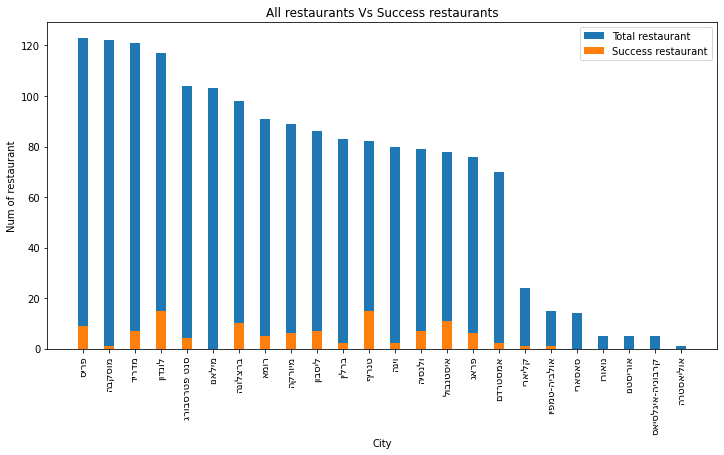

In [39]:
plt.figure(figsize=(12,6))
plt.title("All restaurants Vs Success restaurants")
plt.xlabel("City")
plt.ylabel("Num of restaurant")
plt.bar(city_name, height=city_value, width=0.4, label="Total restaurant")
plt.bar(city_name, height=suc_city_value, width=0.4, label="Success restaurant")
plt.legend()
plt.xticks(rotation = 90).index

In [40]:
success.City.value_counts()/df.City.value_counts()*100

אמור                 5.494505
גארפ                 7.894737
גרובסרטפ טנס         3.846154
דירדמ                5.785124
הבקסומ               0.819672
היסנלו               8.860759
הנולצרב             10.204082
הניו                 2.500000
הקרוימ               6.741573
הרטסאילוא                 NaN
ויפמט-היבלוא         6.666667
ונאלימ                    NaN
ונטסירוא                  NaN
ורואונ                    NaN
יראילק               4.166667
יראסאס                    NaN
לובנטסיא            14.102564
םדרטסמא              2.857143
ןובסיל               8.139535
ןודנול              12.820513
ןילרב                2.409639
סאיסלגיא-הינוברק          NaN
סירפ                 7.317073
ףירנט               18.292683
Name: City, dtype: float64

### Most successful restaurants sell the dishess at reasonable prices (not cheap)

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Expensive')

([<matplotlib.patches.Wedge at 0x1e8c3e4f6a0>,
 [Text(1.0562361482150548, -0.30718919122232285, '2.0'),
  Text(-1.0562361410247727, 0.30718921594531395, '1.0')],
 [Text(0.5761288081173026, -0.16755774066672152, '91.0%'),
  Text(-0.5761288041953304, 0.1675577541519894, '9.0%')])

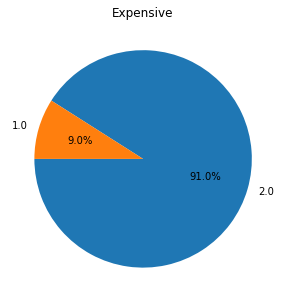

In [41]:
plt.figure(figsize=(10, 5))
plt.title('Expensive')
plt.pie(success.Expensive.value_counts(),labels=success.Expensive.value_counts().index,autopct='%1.1f%%',startangle=180);
plt.show()

### We see that the rating of the ambience and service less influential than the rating of the food and the value on the rating total

<AxesSubplot:xlabel='Rating_total'>

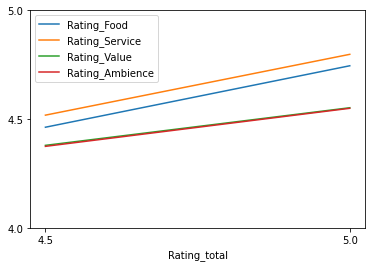

In [42]:
success= success.dropna(subset=['Rating_Food','Rating_Service','Rating_Value'])
columns_float=['Rating_Food','Rating_Service','Rating_Value','Rating_Ambience', 'Rating_total']
columns_int=['Rating_Excellent','Rating_Very_Good', 'Rating_Average', 'Rating_Bad', 'Rating_Very_Bad',
                  'Reviews','Expensive','URL','Phone','Menu']
for col in columns_float:
    success[col]=success[col].astype('float')
    
for col in columns_int:
    success[col]=success[col].astype('int')
(success.groupby(['Rating_total']).mean()[['Rating_Food','Rating_Service','Rating_Value', 'Rating_Ambience']]).plot(xticks=[4.5, 5.0],yticks=[4.0,4.5,5.0])

### We see that rating of food is the best in Prague and London

<Figure size 576x288 with 0 Axes>

Text(0.5, 1.0, 'The average rating of food in each city')

Text(0.5, 0, 'City')

Text(0, 0.5, 'Rating of food')

(0.0, 5.5)

<BarContainer object of 18 artists>

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

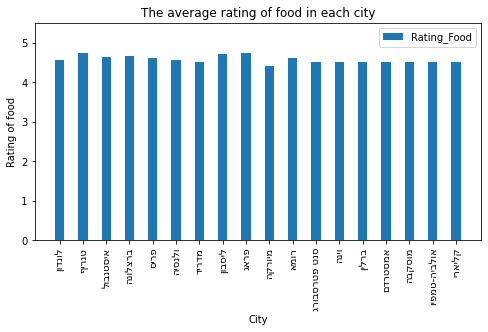

In [43]:
Rating_Food=[]
for c in success.City.value_counts().index:
    Rating_Food.append((success['Rating_Food'][success['City']==c]).mean())

plt.figure(figsize=(8,4))
plt.title("The average rating of food in each city")
plt.xlabel("City")
plt.ylabel("Rating of food")
plt.ylim(0,5.5)
plt.bar(success.City.value_counts().index, height=Rating_Food, width=0.4, label="Rating_Food")
plt.legend()
plt.xticks(rotation = 90).index

### We see that the vast majority of successful restaurants work 7 days a week

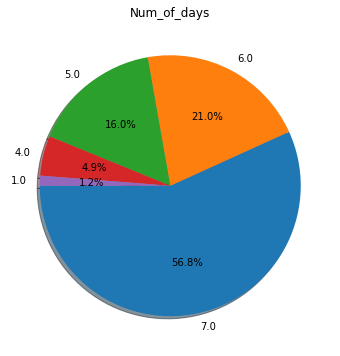

In [44]:
plt.figure(figsize=(12,6))
plt.title('Num_of_days')
plt.pie(success['Num_of_days'].value_counts(),labels=success['Num_of_days'].value_counts().index,autopct='%1.1f%%',startangle=180,shadow=True);

### Return the caption to normal

In [45]:
for i in df.index:
    df['City'][i] = bidialg.get_display(df['City'][i])
    df['Type'][i] = bidialg.get_display(df['Type'][i])
for i in success.index:
    success['City'][i] = bidialg.get_display(success['City'][i])
    success['Type'][i] = bidialg.get_display(success['Type'][i])

## Machine Learning

### Add a column indicating whether the restaurant succeeds-1 or not-0

In [46]:
Is_Success=[]
for i in df.index:
    if(((df['Reviews'][i]>=500) & (df['Rating_Excellent'][i]>=(3/4)*df['Reviews'][i]) & (df['Expensive'][i]<=2)) & (((df['Rating_total'][i]==4.5) & (df['Phone'][i]==1) & (df['URL'][i]==1) & (df['Menu'][i]==1)) | (df['Rating_total'][i]==5.0))):
        Is_Success.append(1)
    else:
        Is_Success.append(0)
df['Is_Success']=Is_Success        

In [47]:
df[df['Is_Success']==1]

,Name,City,Address,Rating_City,Rating_Food,Rating_Service,Rating_Value,Rating_Ambience,Rating_total,Rating_Excellent,...,Reviews,Type,Remarks,Expensive,Price,URL,Phone,Num_of_days,Menu,Is_Success
0,Vrutal,ברצלונה,"‪Rambla del Poblenou No 16‬ Bajos 4, 08005 ברצ...","מס' 1 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,4.5,None,5.0,752.0,...,795.0,"בר, בריא","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,29 ₪ - 80 ₪,1,1,7.0,1,1
1,BelleBuon,ברצלונה,"‪Travessera de Gracia, 441‬, 08025 ברצלונה ספרד","מס' 2 מתוך 8,850 מסעדות בברצלונה",5.0,4.5,4.5,4.5,5.0,2686.0,...,3079.0,"איטלקי, נפוליטני, קמפניה, סיציליאני, דרום איטלקי",אפשרויות ללא גלוטן,2.0,36 ₪ - 90 ₪,1,1,6.0,1,1
2,La Gastronomica Burgers,ברצלונה,"‪Carrer Vilamari 9-15‬, 08015 ברצלונה ספרד","מס' 5 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,4.5,None,5.0,1295.0,...,1483.0,מאכלי רחוב,"ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,43 ₪ - 54 ₪,1,1,5.0,1,1
6,Cremat 11,ברצלונה,"‪Carrer Cremat Gran iXic 11‬, 08003 ברצלונה ספרד","מס' 32 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,4.5,None,5.0,448.0,...,501.0,"אירופאי, בינלאומי","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,36 ₪ - 90 ₪,1,1,7.0,1,1
8,Eixampeling Brunch Café & Bar,ברצלונה,"‪Diputacion 158‬, 08011 ברצלונה ספרד","מס' 41 מתוך 8,850 מסעדות בברצלונה",5.0,5.0,4.5,None,5.0,940.0,...,1089.0,"בית קפה, בריא, פיוז'ן","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,None,1,1,7.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,Agra Tandoori Indian Restaurant,מיורקה,"‪Avenida Gabriel Roca, 23‬, 07014 פלמה דה מיור...","מס' 2 מתוך 2,066 מסעדות בפלמה דה מיורקה",4.5,5.0,4.5,None,5.0,1115.0,...,1248.0,הודי,"חלאל, ידידותי לצמחוניים, אפשרויות לטבעונים, אפ...",2.0,54 ₪ - 109 ₪,1,1,7.0,1,1
1587,Emege,מיורקה,"‪Carretera Arenal 45‬, 07600 פלאיה דה פאלמה, מ...",מס' 1 מתוך 60 מסעדות בפלאיה דה פאלמה,4.0,4.0,4.0,4.0,4.5,776.0,...,991.0,"ים תיכוני, ספרדי, בינלאומי","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,54 ₪ - 181 ₪,1,1,7.0,1,1
1594,Restaurant Los Arcos,מיורקה,"‪Calle Monturiol 28‬, 07590 קאלה רטיאדה, מיורק...",מס' 1 מתוך 112 מסעדות בקאלה רטיאדה,4.5,4.5,4.5,4.5,4.5,471.0,...,621.0,"מאכלי ים, ים תיכוני, אירופאי, ספרדי, מרכז אירו...","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,22 ₪ - 87 ₪,1,1,7.0,1,1
1605,Xelini Port de Sóller,מיורקה,"‪San Ramó de Penyafort 26‬, 07100 פורט דה סולר...",מס' 6 מתוך 73 מסעדות בפורט דה סולר,4.5,5.0,4.5,None,4.5,504.0,...,630.0,"ים תיכוני, ספרדי","ידידותי לצמחוניים, אפשרויות לטבעונים, אפשרויות...",2.0,54 ₪ - 127 ₪,1,1,6.0,1,1


In [48]:
Target_Feature='Is_Success'
X=pd.DataFrame({'Rating_total':df['Rating_total'], 'Reviews':df['Reviews'],'Rating_Excellent':df['Rating_Excellent'], 'Expensive':df['Expensive'], 'URL':df['URL'], 'Phone':df['Phone'], 'Menu':df['Menu']})
y=df[Target_Feature].copy()

In [49]:
X

,Rating_total,Reviews,Rating_Excellent,Expensive,URL,Phone,Menu
0,5.0,795.0,752.0,2.0,1,1,1
1,5.0,3079.0,2686.0,2.0,1,1,1
2,5.0,1483.0,1295.0,2.0,1,1,1
3,5.0,188.0,178.0,1.0,1,1,0
4,5.0,437.0,388.0,2.0,0,1,0
...,...,...,...,...,...,...,...
1666,4.5,497.0,321.0,2.0,1,1,0
1667,4.5,979.0,574.0,1.0,1,1,0
1668,4.5,514.0,317.0,2.0,1,1,0
1669,4.5,141.0,94.0,2.0,1,1,1


In [50]:
y

0       1
1       1
2       1
3       0
4       0
       ..
1666    0
1667    0
1668    0
1669    0
1670    0
Name: Is_Success, Length: 1671, dtype: int64

In [51]:
y.describe()

count    1671.000000
mean        0.066427
std         0.249102
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Is_Success, dtype: float64

### We will split the dataframe for training and testing

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

### We will use the Naive Bayes method

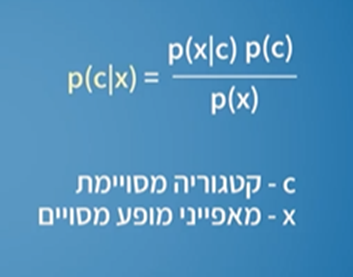

In [53]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

print('Accuracy on Train data= ', metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train))
print('Accuracy on Test data= ', metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

GaussianNB()

Accuracy on Train data=  0.875748502994012
Accuracy on Test data=  0.8776119402985074


### We got a pretty good level of accuracy

In [54]:
gnb.class_prior_

array([0.93637725, 0.06362275])

### We can see that by definition I have chosen only 6.4% are considered successful

In [55]:
gnb.theta_

array([[4.48920863e+00, 5.74274980e+02, 3.73758593e+02, 1.97761791e+00,
        9.80815348e-01, 9.94404476e-01, 6.14708233e-01],
       [4.72941176e+00, 1.21280000e+03, 1.01409412e+03, 1.90588235e+00,
        1.00000000e+00, 1.00000000e+00, 8.23529412e-01]])

### We have 2 arrays, the first for "failing" and the second for "successful". 
### The average of rating total in array "successful" is higher than the average of the failing.
### In addition more people rated the successful restaurants and of course most of them rated them with an excellent score compared to the failing restaurants

In [56]:
X.columns

Index(['Rating_total', 'Reviews', 'Rating_Excellent', 'Expensive', 'URL',
       'Phone', 'Menu'],
      dtype='object')

## Conclusion:

### In conclusion, we have seen that it is possible to predict whether a restaurant will be defined as successful or not based on characteristics that we have defined as important for success.
### We saw that in Tenerife and London there were more successful restaurants than the rest of the cities but the average food rating was high in London and Prague

## Bibliography:

#### https://www.tripadvisor.co.il/Restaurants-g4-Europe.html
#### https://scikit-learn.org/stable/index.html
#### https://matplotlib.org/stable/index.html
#### https://yam-analytics.com/data-analysis-with-paython-part-1/
#### https://stackoverflow.com/
#### https://reshetech.co.il/